Задача 7.3


In [22]:
%matplotlib inline

import numpy as np
from scipy.stats import cauchy
import matplotlib.pyplot as plt

N = 100
sample = cauchy.rvs(size=N)

В случае неизвестного матожидания, сопряженным семейством распределений является нормальное, причем если параметры априорного распределения равны (loc0, scale0), то параметры апостериорного равны ().

Параметры априорного распределения выберем на основе знаний о матожидании (с вероятностью не меньше 0.95 $|\theta| < 0.5$). То есть возьмем дисперсию так, чтобы $3 * \sigma = 0.5$.

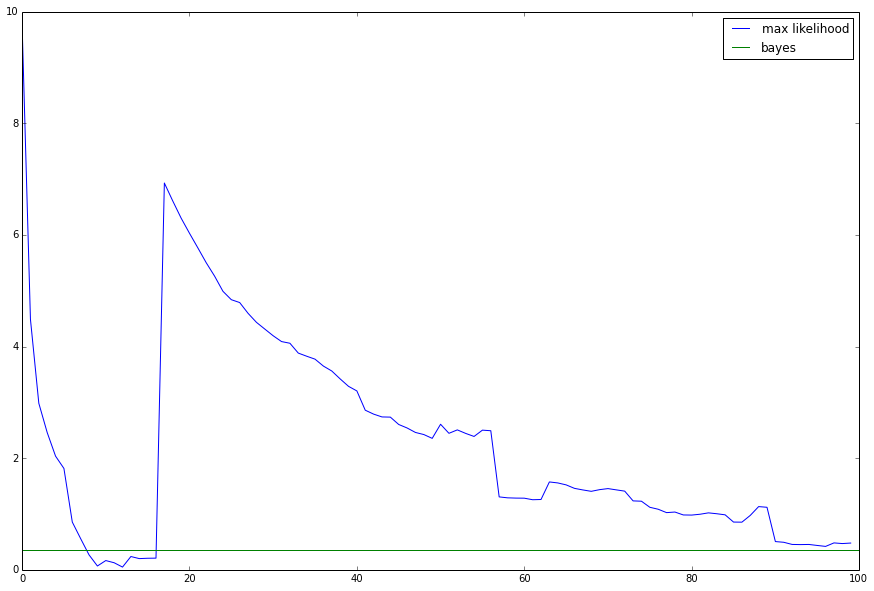

In [25]:
def max_likelihood_estimator_error(sample):
    return abs(np.mean(sample))

def bayes_estimator_error(loc0, scale0, sample):
    return abs((float(loc0) / scale0 + np.sum(sample))
               / (1.0 / scale0 + len(sample)))

def draw():
    plt.figure(figsize=(15,10))

    errors = [max_likelihood_estimator_error(sample[:i+1]) for i in range(N)]
    plt.plot(range(N), errors, label="max likelihood")

    bayes_error = bayes_estimator_error(0, (0.5 / 3) **2, sample)
    plt.plot([0, 100], [bayes_error, bayes_error], label="bayes")
    
    plt.legend()
    plt.show()

draw()

Из графика видно, что байесовская оценка лучше оценки максимального правдоподобия, Это объясняется тем, что байесовская оценка посчитана на основе дополнительных априорных знаний о выборке.